In [1]:
import pyzbar.pyzbar as pyzbar
import cv2
import matplotlib.pyplot as plt

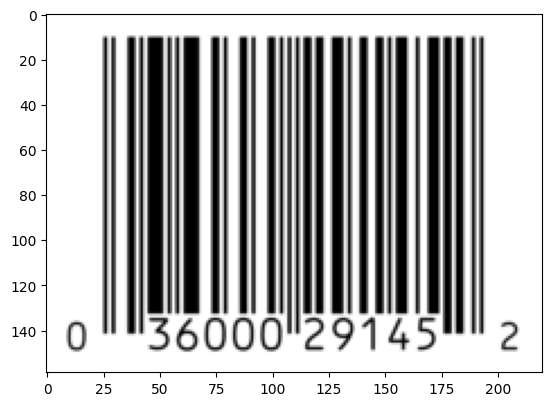

In [2]:
img = cv2.imread('Barcode.png')
plt.imshow(img)

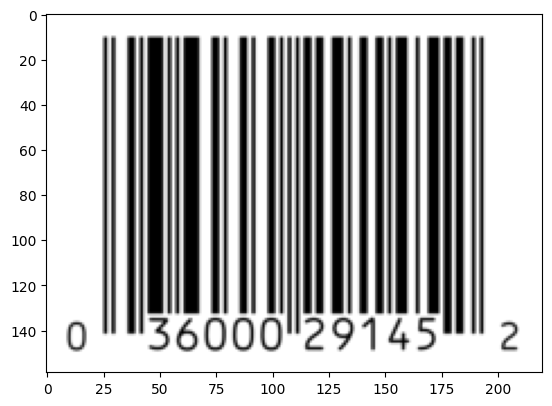

In [3]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')

In [4]:
decoded = pyzbar.decode(gray)

decoded

[Decoded(data=b'0036000291452', type='EAN13', rect=Rect(left=26, top=10, width=168, height=122), polygon=[Point(x=26, y=11), Point(x=26, y=131), Point(x=112, y=132), Point(x=194, y=132), Point(x=194, y=10)], quality=245, orientation='UP')]

0036000291452
EAN13


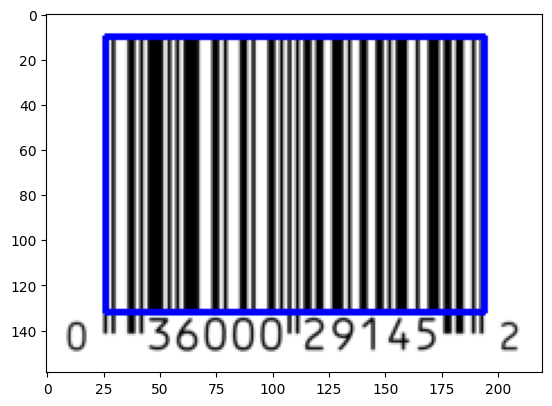

In [5]:
for d in decoded:
    print(d.data.decode('utf-8'))
    print(d.type)
    
    cv2.rectangle(img, (d.rect[0], d.rect[1]),(d.rect[0] + d.rect[2], d.rect[1] + d.rect[3]), (0,0,255), 2)

plt.imshow(img)    

In [ ]:
import pyzbar.pyzbar as pyzbar
import cv2

cap = cv2.VideoCapture(0)

i = 0
while(cap.isOpened()):
  ret, img = cap.read()

  if not ret:
    continue

  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
     
  decoded = pyzbar.decode(gray)

  for d in decoded: 
    x, y, w, h = d.rect

    barcode_data = d.data.decode("utf-8")
    barcode_type = d.type

    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

    text = '%s (%s)' % (barcode_data, barcode_type)
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)
    

  cv2.imshow('img', img)

  key = cv2.waitKey(1)
  if key == ord('q'):
    break
  elif key == ord('s'):
    i += 1
    cv2.imwrite('c_%03d.jpg' % i, img)

cap.release()
cv2.destroyAllWindows()

ValueError: Invalid RGBA argument: 'deepink'

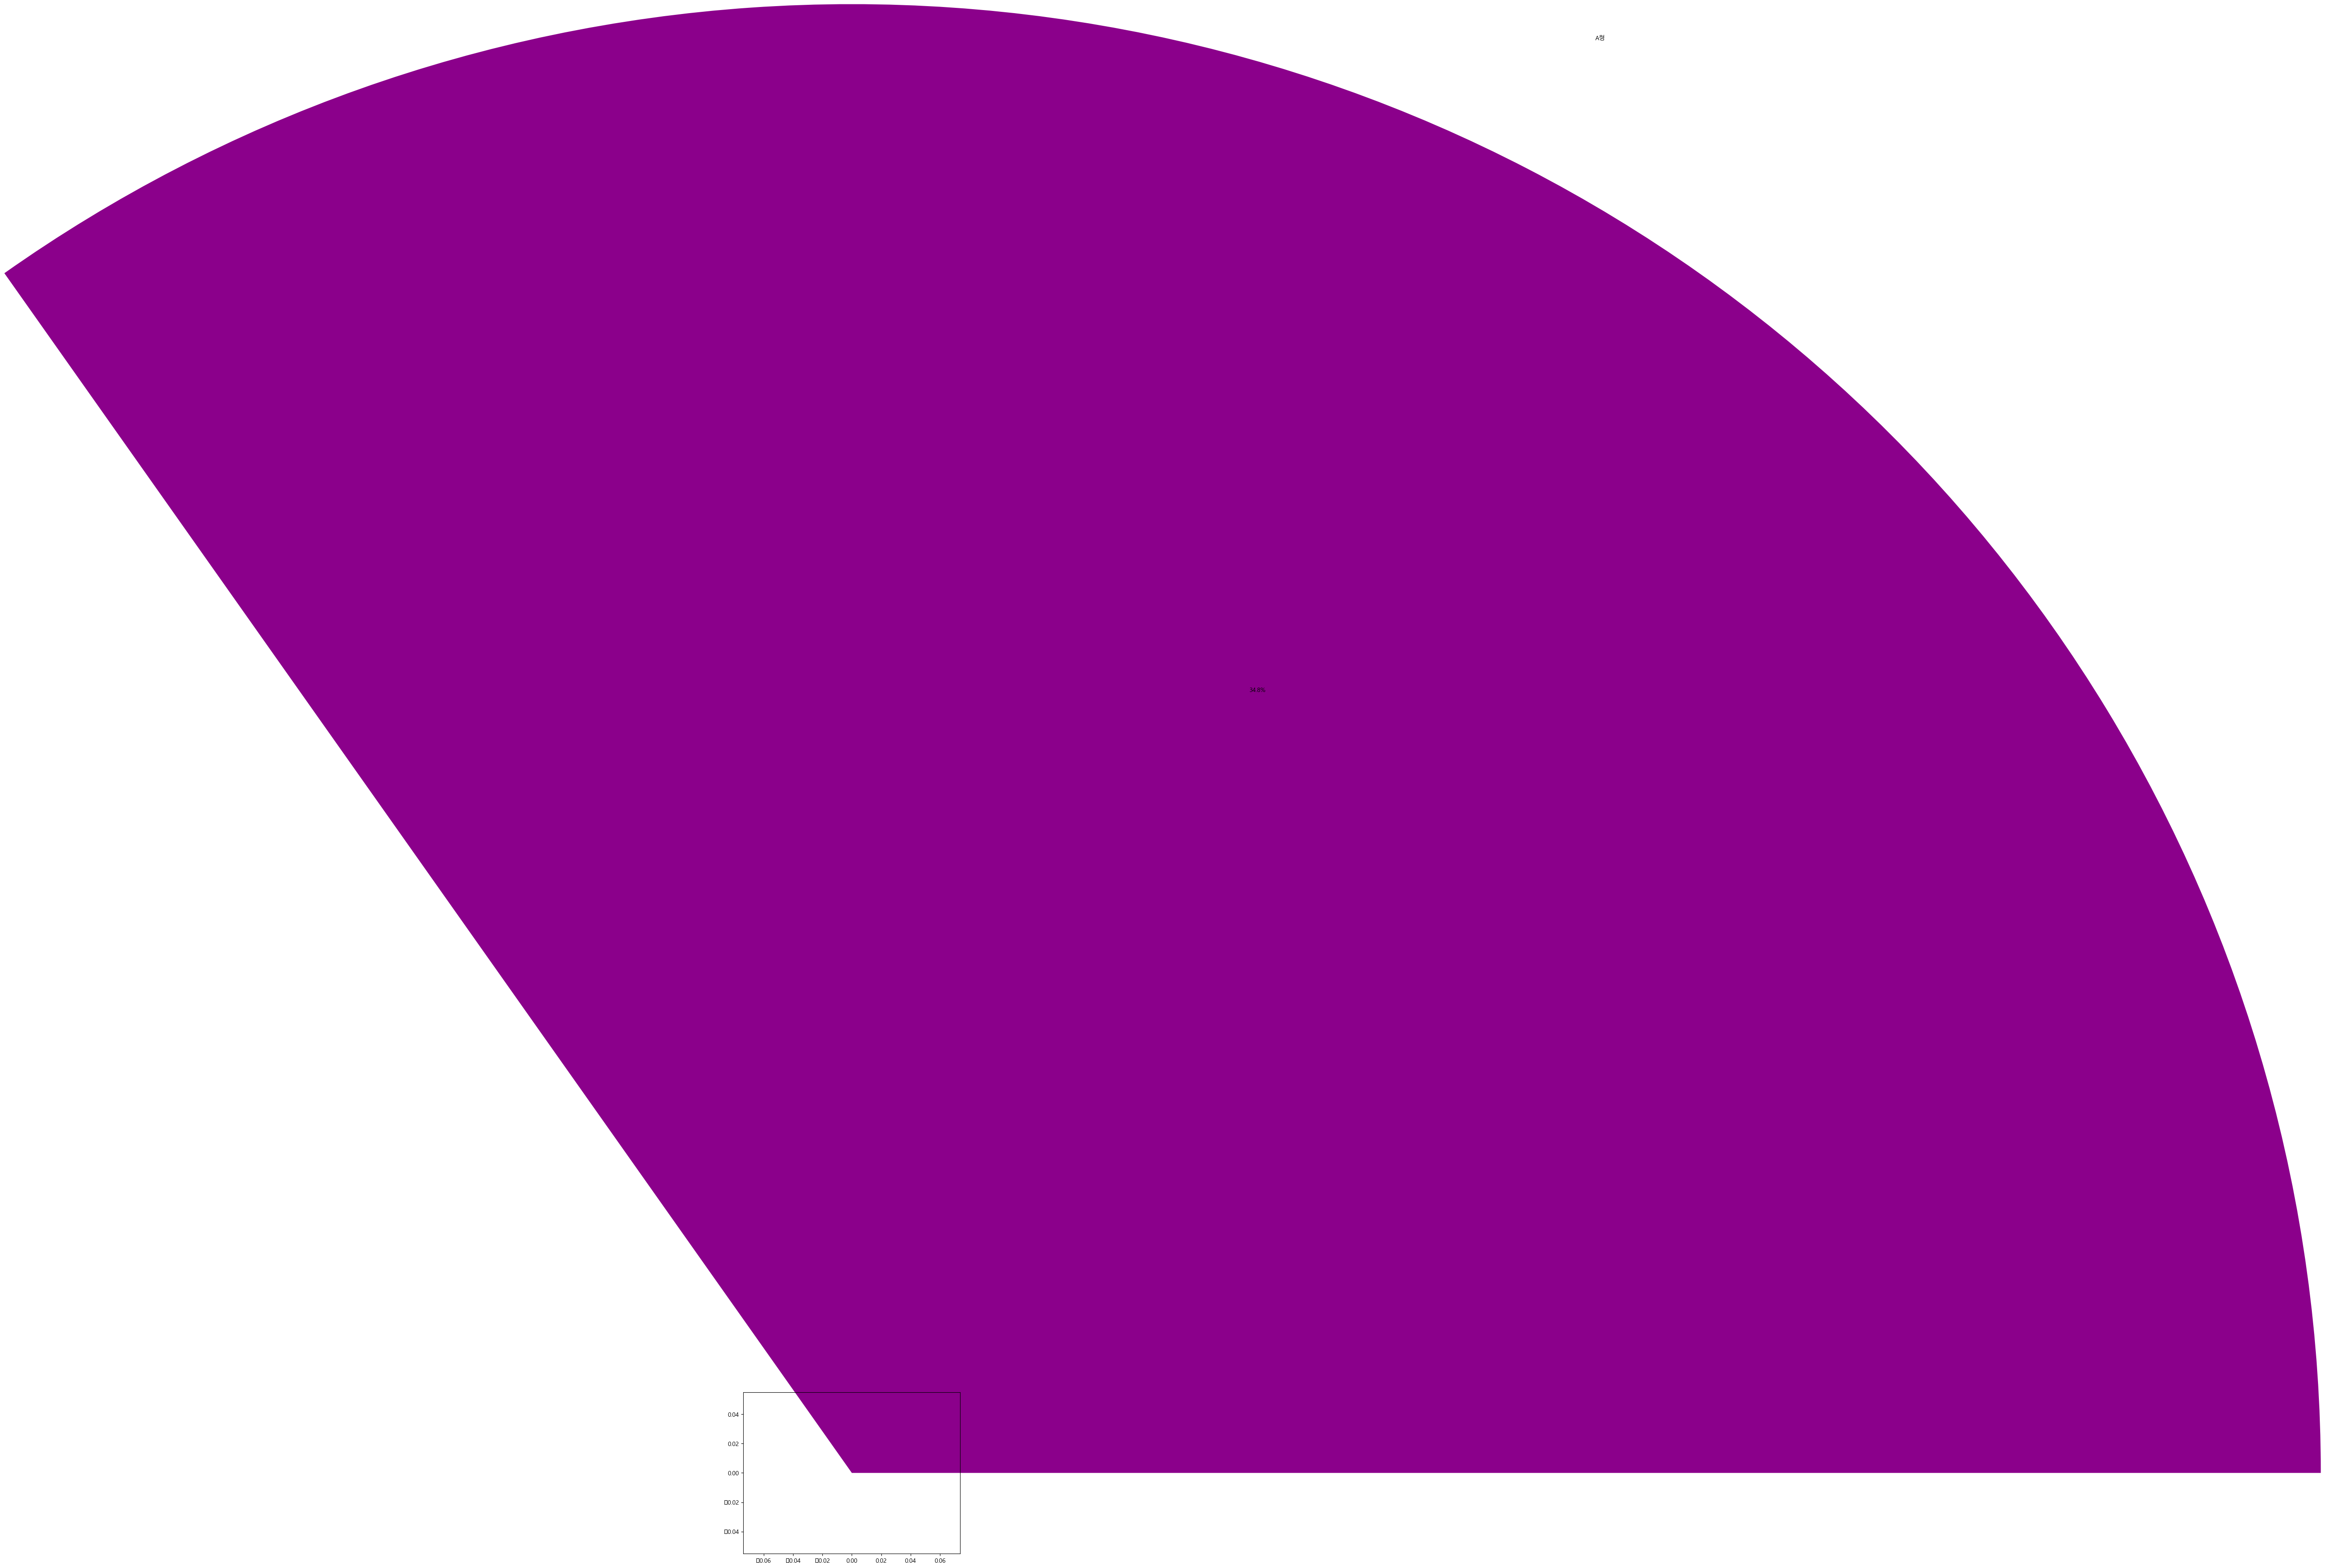

In [4]:
import matplotlib.pyplot as plt

size = [2441, 2312, 1031, 1233]
color = ['darkmagenta', 'deepink', 'hotpink', 'pink']
label = ['A형', 'B형', 'AB형', 'O형']

plt.axis('equal')
plt.rc('font', family = 'Malgun Gothic')
plt.pie(size, labels = label, autopct = '%.1f%%', colors = color, explode = (0,0,0.1,0))
plt.legend()
plt.show()